In [1]:
from matplotlib import pyplot as plt
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import LBFGSAttack
from foolbox.criteria import TargetClassProbability 
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

# There's a lady who's sure, all that glitters is gold...

We have seen so far how the introduction of techniques such as convolution can improve the performance of our networks in quite a significant way. Thus, we might be tempted to say that our networks can solve the problem of object recognition well enough, at the small cost of some supervised training.

### **...is it true, though?**

Now we will analyze what happens when we add some noise to the image, and how the network reacts to its presence. We will use different kinds of noises, some (blurring, salt-and-pepper) more plausible than others (uniform, gaussian). For this tutorial we will make use of FoolBox, a toolbox developed in the lab of Prof. Mattias Bethge to put to test deep learning models.

Let's start by loading a pretrained version of ResNet50 (below, the structure of ResNet35. ResNet50 is built the same way, only with 50 layers):

<div style="text-align:center"><img src ="figs/ResNet.png" /></div>

In [3]:
# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

In [4]:
# get source image and label
image, label = foolbox.utils.imagenet_example()

#### Now, for a simple exercise...

Now, try to estimate how the probability of the correct class varies with the amount of noise applied to the image, for different kinds of noises. You can try any noise you want, but common choices are additive random noises (uniform, gaussian, etc...), gaussian blur, and salt-and-pepper. Plot how the probability of the correct class varies vs. the amount of noise you added.

In [5]:
# A couple of hints:
# 1) Remember: you can mix import statements and code
# 2) Take a look at the scipy.ndimage.filters module, it might have something that might
#    help you...

# P.S. remember to use preprocess_image on the input image before the ResNet models, and feed it a copy of image using image.copy()

Top 5 predictions (adversarial):
n02119789, kit_fox, 0.14231057465076447
n02119022, red_fox, 0.130232572555542
n02123159, tiger_cat, 0.11041339486837387
n02123045, tabby, 0.0597243569791317
n02115913, dhole, 0.04746710881590843

Top 5 predictions (original):
n02123159, tiger_cat, 0.2921046316623688
n02123045, tabby, 0.2530863881111145
n02127052, lynx, 0.14645925164222717
n02124075, Egyptian_cat, 0.10347867757081985
n02119022, red_fox, 0.03192891180515289



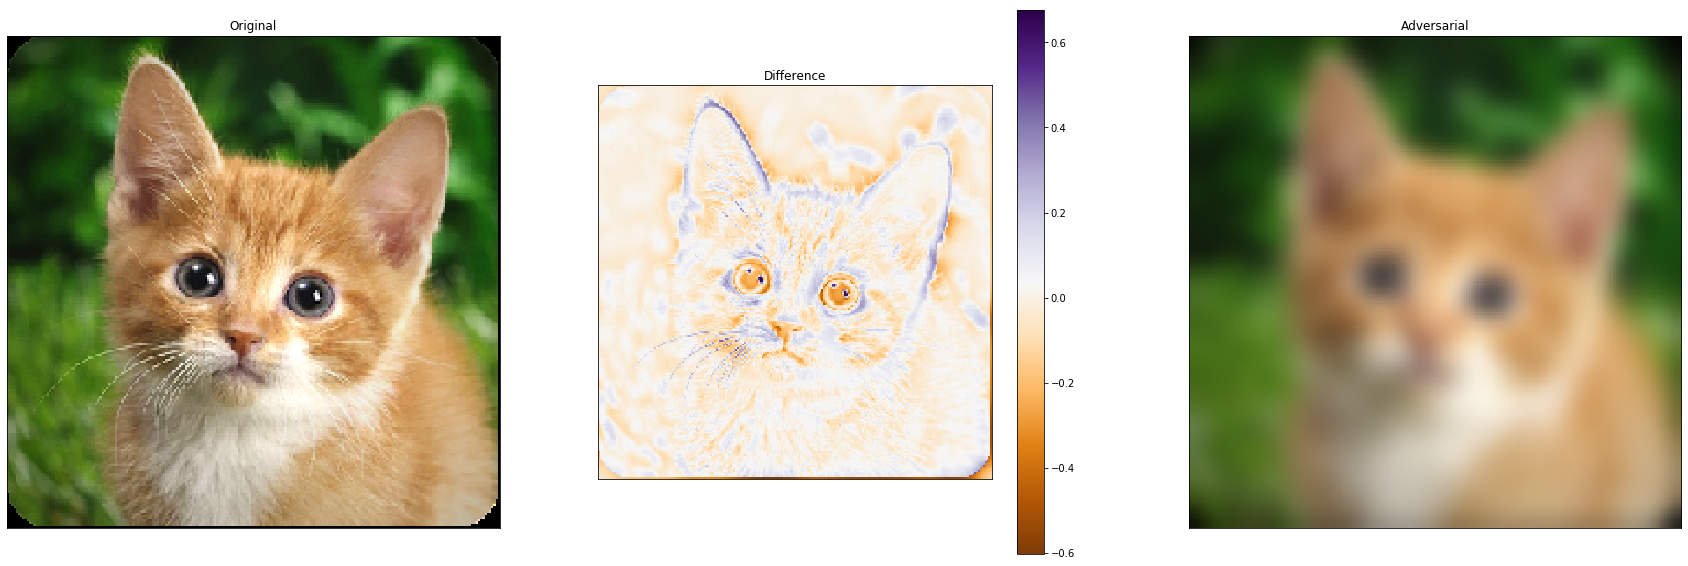

In [6]:
attack = foolbox.attacks.GaussianBlurAttack(model=fmodel)
adversarial = attack(image[:, :, ::-1], label)

# show results
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
preds_orig = kmodel.predict(preprocess_input(image[np.newaxis, :, :, :].copy()))
decoded_preds = decode_predictions(preds, top=5)[0]
decoded_preds_orig = decode_predictions(preds_orig, top=5)[0]
print("Top 5 predictions (adversarial):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds]))
print("Top 5 predictions (original):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds_orig]))


[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image, np.mean(image - adversarial[:, :, ::-1], axis=2), adversarial[:, :, ::-1])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if imdata.ndim == 2:
        im = axis.imshow(imdata/255.0, cmap='PuOr')
        figure.colorbar(im, cmap='PuOr', ax=axis)
    else:
        axis.imshow(imdata/255.0)
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

Top 5 predictions (adversarial):
n02123045, tabby, 0.2916122078895569
n02123159, tiger_cat, 0.27269238233566284
n02127052, lynx, 0.1339775174856186
n02124075, Egyptian_cat, 0.09247777611017227
n02119022, red_fox, 0.028286540880799294

Top 5 predictions (original):
n02123159, tiger_cat, 0.2921046316623688
n02123045, tabby, 0.2530863881111145
n02127052, lynx, 0.14645925164222717
n02124075, Egyptian_cat, 0.10347867757081985
n02119022, red_fox, 0.03192891180515289



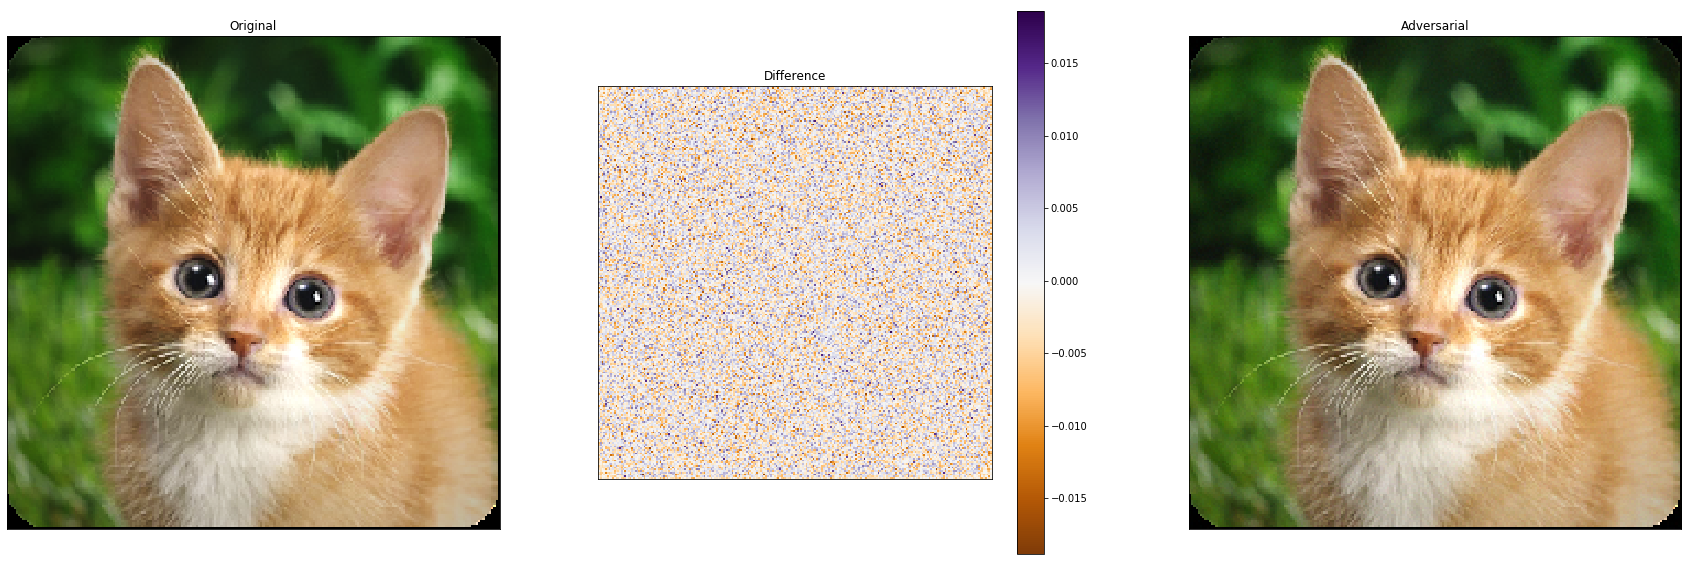

In [7]:
attack = foolbox.attacks.AdditiveGaussianNoiseAttack(model=fmodel)
adversarial = attack(image[:, :, ::-1], label)

# show results
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
preds_orig = kmodel.predict(preprocess_input(image[np.newaxis, :, :, :].copy()))
decoded_preds = decode_predictions(preds, top=5)[0]
decoded_preds_orig = decode_predictions(preds_orig, top=5)[0]
print("Top 5 predictions (adversarial):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds]))
print("Top 5 predictions (original):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds_orig]))

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image, np.mean(image - adversarial[:, :, ::-1], axis=2), adversarial[:, :, ::-1])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if imdata.ndim == 2:
        im = axis.imshow(imdata/255.0, cmap='PuOr')
        figure.colorbar(im, cmap='PuOr', ax=axis)
    else:
        axis.imshow(imdata/255.0)
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

Top 5 predictions (adversarial):
n02123045, tabby, 0.25093501806259155
n02123159, tiger_cat, 0.24527199566364288
n02127052, lynx, 0.16354991495609283
n02124075, Egyptian_cat, 0.11243397742509842
n02119022, red_fox, 0.038107484579086304

Top 5 predictions (original):
n02123159, tiger_cat, 0.2921046316623688
n02123045, tabby, 0.2530863881111145
n02127052, lynx, 0.14645925164222717
n02124075, Egyptian_cat, 0.10347867757081985
n02119022, red_fox, 0.03192891180515289



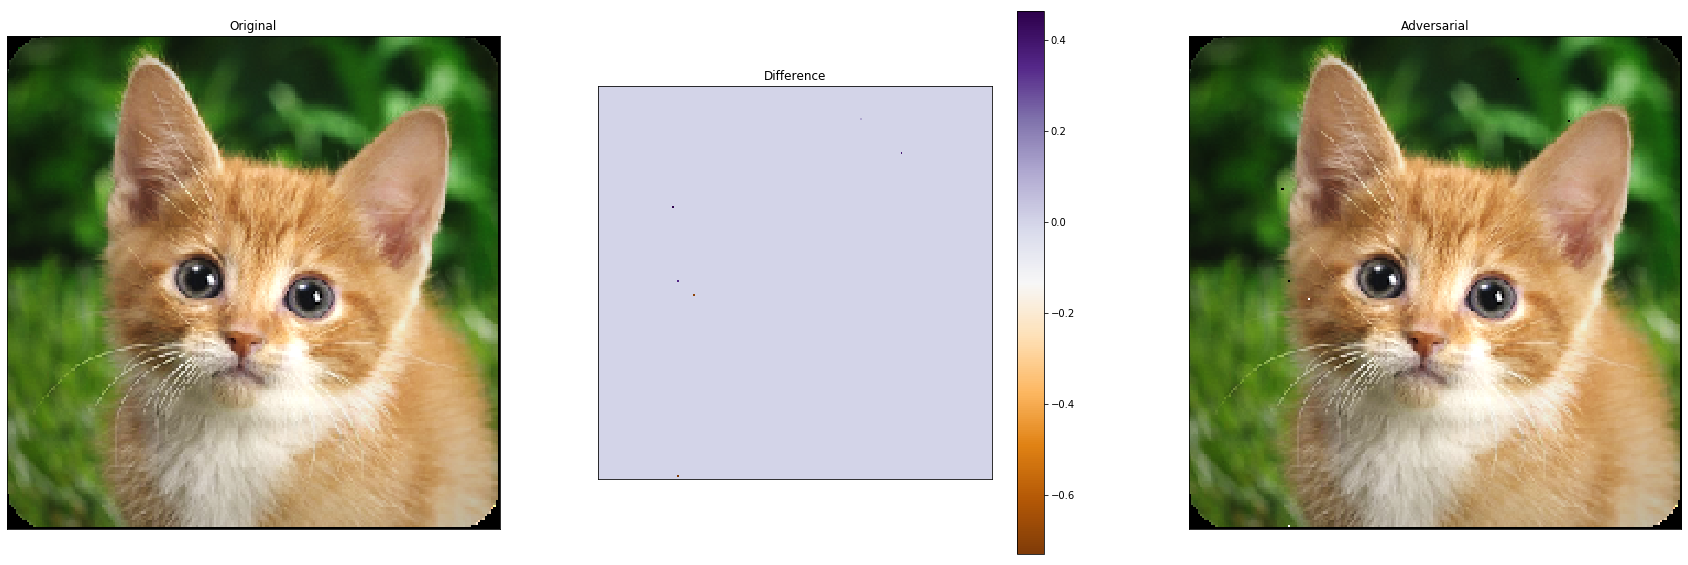

In [8]:
attack = foolbox.attacks.SaltAndPepperNoiseAttack(model=fmodel)
adversarial = attack(image[:, :, ::-1], label)

# show results
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
preds_orig = kmodel.predict(preprocess_input(image[np.newaxis, :, :, :].copy()))
decoded_preds = decode_predictions(preds, top=5)[0]
decoded_preds_orig = decode_predictions(preds_orig, top=5)[0]
print("Top 5 predictions (adversarial):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds]))
print("Top 5 predictions (original):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds_orig]))

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image, np.mean(image - adversarial[:, :, ::-1], axis=2), adversarial[:, :, ::-1])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if imdata.ndim == 2:
        im = axis.imshow(imdata/255.0, cmap='PuOr')
        figure.colorbar(im, cmap='PuOr', ax=axis)
    else:
        axis.imshow(imdata/255.0)
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

# ...and she's buying a stairway to heaven.

So far the situation doesn't look particularly good for deep networks, even though the images are misclassified in classes that are quite related to the original class (e.g. "tabby" and "tiger cat").
There is, however, an intriguing property of deep networks: images can be perturbed in imperceptible ways that still cause the net to misclassify the input. The method we used is called the Fast Gradient Sign Method
$$
\eta=\epsilon\cdot\mathrm{sign}(\nabla_x C(\theta, x, y))
$$
This amounts to linearizing the cost function around the value of $\theta$ and then perturbing the image by adding a small amount in the direction pointed by the gradient; the adversarial is still classified in a category close to the original, but the perturbation is around $0.15‰$. If we allow the perturbation to be in the order of a few percent, we can also use an optimization method, such as the Limited-memory Broyden-Fletcher-Goldfarb-Shanno (a.k.a. L-BFGS) algorithm, to have the network misclassify the input in a category of choice.

In [9]:
# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50
# expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)
fg_adversarial = attack(image[:, :, ::-1], label)
# if the attack fails, adversarial will be None and a warning will be printed

Top 5 predictions (adversarial):
n02123045, tabby, 0.24686755239963531
n02123159, tiger_cat, 0.23162879049777985
n02127052, lynx, 0.17119677364826202
n02124075, Egyptian_cat, 0.10422122478485107
n02119022, red_fox, 0.04537777230143547

Top 5 predictions (original):
n02123159, tiger_cat, 0.2921046316623688
n02123045, tabby, 0.2530863881111145
n02127052, lynx, 0.14645925164222717
n02124075, Egyptian_cat, 0.10347867757081985
n02119022, red_fox, 0.03192891180515289



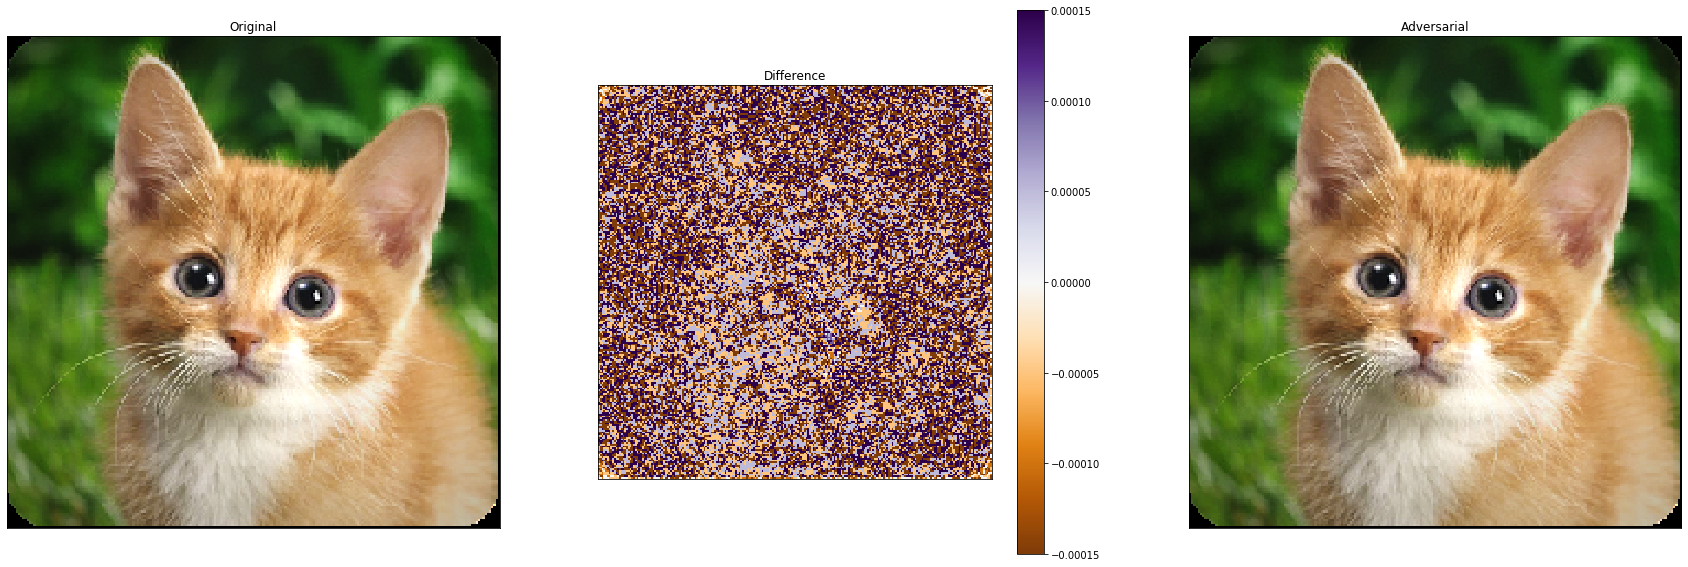

In [10]:
adversarial_rgb = fg_adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
preds_orig = kmodel.predict(preprocess_input(image[np.newaxis, :, :, :].copy()))
decoded_preds = decode_predictions(preds, top=5)[0]
decoded_preds_orig = decode_predictions(preds_orig, top=5)[0]
print("Top 5 predictions (adversarial):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds]))
print("Top 5 predictions (original):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds_orig]))

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image, np.mean(image - fg_adversarial[:, :, ::-1], axis=2), fg_adversarial[:, :, ::-1])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if imdata.ndim == 2:
        im = axis.imshow(imdata/255.0, cmap='PuOr')
        figure.colorbar(im, cmap='PuOr', ax=axis)
    else:
        axis.imshow(imdata/255.0)
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

In [11]:
# run the attack
target_class = 420
attack = LBFGSAttack(model=fmodel,
                     criterion=TargetClassProbability(target_class, p=.99))
lbfgs_adversarial = attack(image[:, :, ::-1], label)

# show results
print(np.argmax(fmodel.predictions(lbfgs_adversarial)))
print(foolbox.utils.softmax(fmodel.predictions(adversarial))[target_class])
adversarial_rgb = lbfgs_adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
preds_orig = kmodel.predict(preprocess_input(image[np.newaxis, :, :, :].copy()))
decoded_preds = decode_predictions(preds, top=5)[0]
decoded_preds_orig = decode_predictions(preds_orig, top=5)[0]
print("Top 5 predictions (adversarial):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds]))
print("Top 5 predictions (original):\n" +
      "".join(["{}, {}, {}\n".format(*i) for i in decoded_preds_orig]))

420
2.9772096e-05
Top 5 predictions (adversarial):
n02787622, banjo, 0.9901599287986755
n02123045, tabby, 0.0012338395463302732
n02676566, acoustic_guitar, 0.0010281085269525647
n02123159, tiger_cat, 0.0009757217485457659
n03272010, electric_guitar, 0.0008876518113538623

Top 5 predictions (original):
n02123159, tiger_cat, 0.2921046316623688
n02123045, tabby, 0.2530863881111145
n02127052, lynx, 0.14645925164222717
n02124075, Egyptian_cat, 0.10347867757081985
n02119022, red_fox, 0.03192891180515289



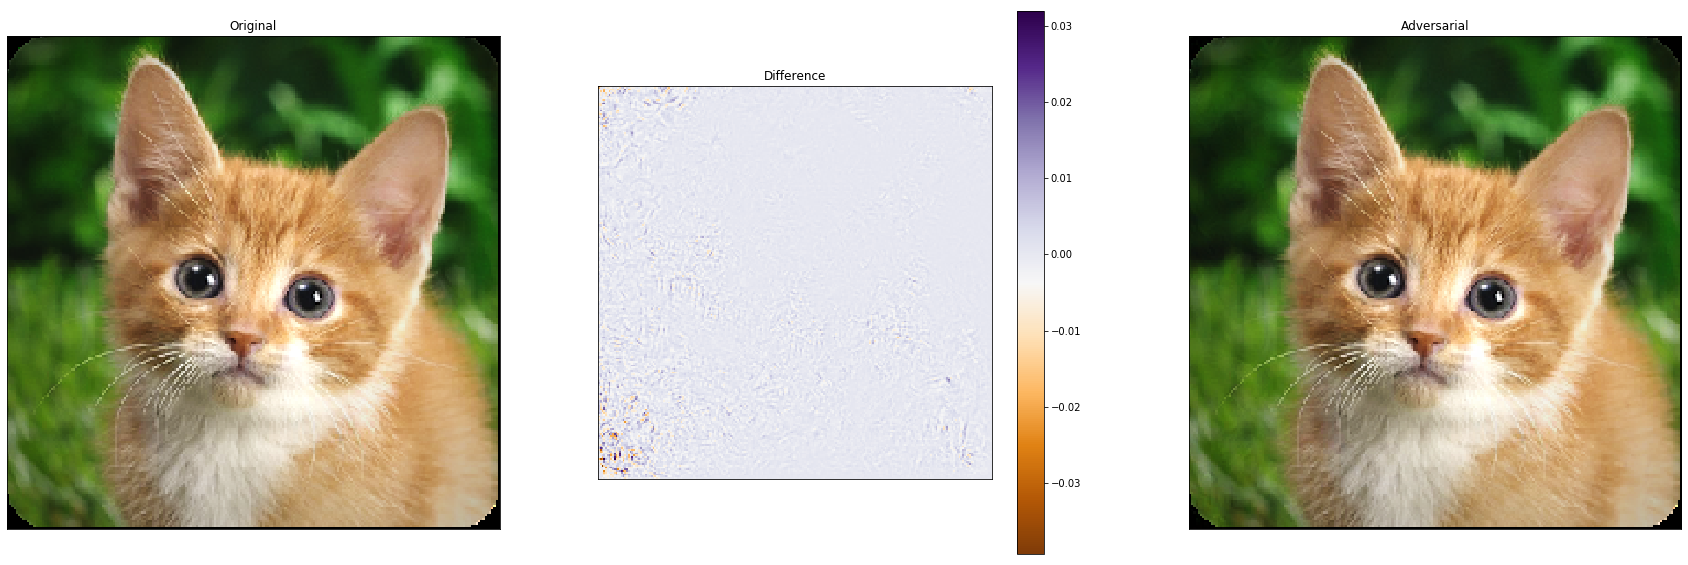

In [12]:
[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image, np.mean(image - lbfgs_adversarial[:, :, ::-1], axis=2), lbfgs_adversarial[:, :, ::-1])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if imdata.ndim == 2:
        im = axis.imshow(imdata/255.0, cmap='PuOr')
        figure.colorbar(im, cmap='PuOr', ax=axis)
    else:
        axis.imshow(imdata/255.0)
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

# Adversarial on a simpler task

We might now be tempted to think that a simpler problem is less prone to such gimmicks. To test that, we will try to apply the same attacks to one of the networks we used to solve the MNIST challenge in the third tutorial. We will start by using the one with just one convolutional layer and one fully connected layer.

<div style="text-align:center"><img src ="figs/convolutional.png" /></div>

In [13]:
(i_train, l_train), (i_test, l_test) = keras.datasets.mnist.load_data()
i_train, i_test = i_train/255.0, i_test/255.0
i_train, i_test = i_train.astype(np.float32), i_test.astype(np.float32)
i_train, i_test = np.expand_dims(i_train, 3), np.expand_dims(i_test, 3)
l_train, l_test = keras.utils.np_utils.to_categorical(l_train), keras.utils.np_utils.to_categorical(l_test)
i_validate = i_train[50000:, :, :, :]
i_train = i_train[0:50000, :, :, :]
l_validate = l_train[50000:, :]
l_train = l_train[0:50000, :]

In [14]:
kmodel = keras.models.load_model('models/convolutional.h5')
fmodel = KerasModel(kmodel, bounds=(0,1))

Label predicted: 5, true label: 0


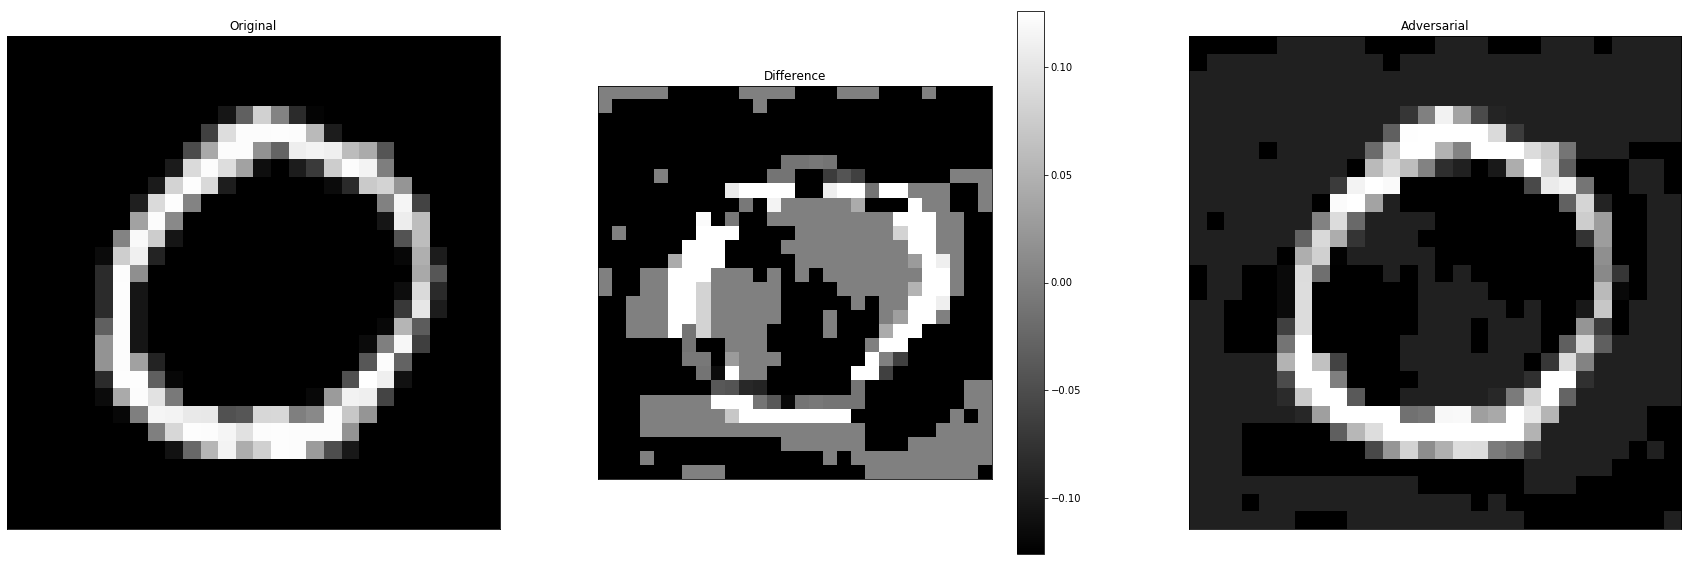

In [15]:
image = i_validate[42]
label = np.argmax(l_validate[42])
attack = foolbox.attacks.FGSM(model=fmodel)
adversarial_fg = attack(image, label)
adversarial = adversarial_fg

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image[:, :, 0], (image[:, :, 0] - adversarial[:, :, 0]), adversarial[:, :, 0])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if title == "Difference":
        im = axis.imshow(imdata, cmap='gray')
        figure.colorbar(im, cmap='gray', ax=axis)
    else:
        axis.imshow(imdata, cmap='gray')
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
    
print("Label predicted: %d, true label: %d" %
      (np.argmax(fmodel.predictions(adversarial)),
       np.argmax(fmodel.predictions(image))))

Label predicted: 5, true label: 7


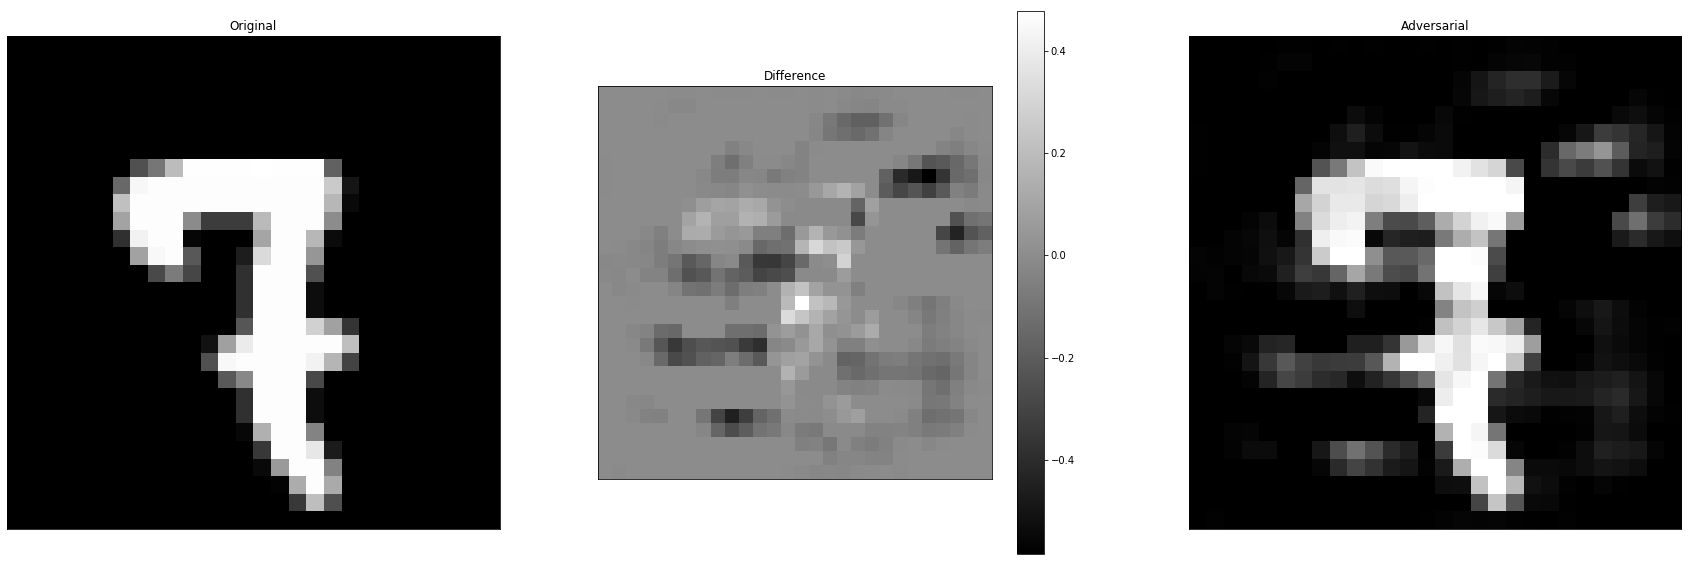

In [16]:
source_class = 64
image = i_validate[source_class]
label = np.argmax(l_validate[source_class])
target_class = 5
attack = LBFGSAttack(model=fmodel,
                     criterion=TargetClassProbability(target_class, p=.5))
adversarial_lbfgs = attack(image, label)
adversarial = adversarial_lbfgs

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image[:, :, 0], (image[:, :, 0] - adversarial[:, :, 0]), adversarial[:, :, 0])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if title == "Difference":
        im = axis.imshow(imdata, cmap='gray')
        figure.colorbar(im, cmap='gray', ax=axis)
    else:
        axis.imshow(imdata, cmap='gray')
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
    
print("Label predicted: %d, true label: %d" %
      (np.argmax(fmodel.predictions(adversarial)),
       np.argmax(fmodel.predictions(image))))

You can see that the network can be fooled into misclassification by imperceptible changes in the input, and even in the case of a targeted adversarial, the changes are indeed visible, but applied to seemingly unrelated parts of the image. One could now argue that this is due to the low complexity (and, in a sense, low computational power) of this simple network, so we will now feed the adversarial to the network with two convolutional and two dense layers

<div style="text-align:center"><img src ="figs/2dense.png" /></div>

and also to the best network we built, the one with dropout layers.

<div style="text-align:center"><img src ="figs/dropout.png" /></div>

What we will find (spoiler alert!) is that not only the network is still vulnerable to adversarial examples, but that the adversarial images built for the simple, one-convolutional-layer network work out of the box! This hints that the sensitivity to adversarial examples comes from a much more fondamental property of convolutiona neural networks, such as, possibly, the fact that they essentially act as bag-of-features accumulators.

Label predicted: 5, true label: 7


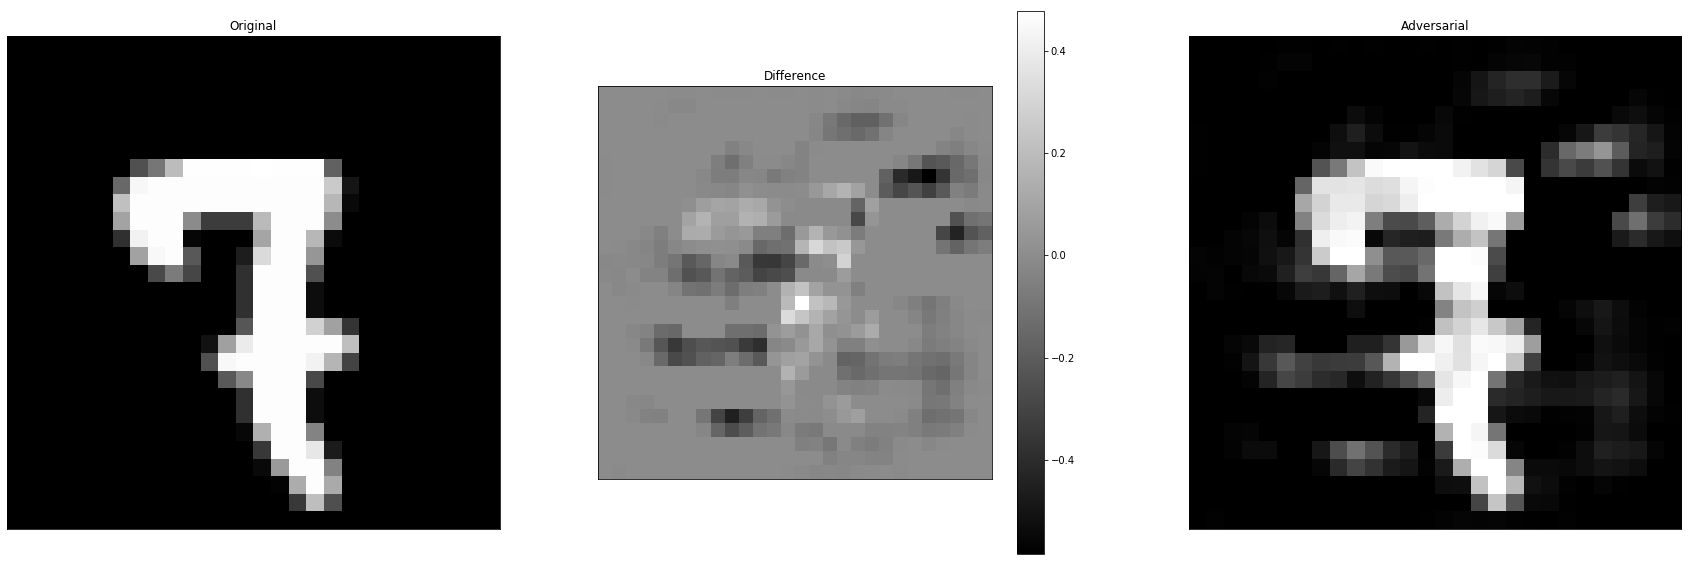

In [17]:
kmodel = keras.models.load_model('models/convolutional_2dense.h5')
adversarial = adversarial_lbfgs

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image[:, :, 0], (image[:, :, 0] - adversarial[:, :, 0]), adversarial[:, :, 0])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if title == "Difference":
        im = axis.imshow(imdata, cmap='gray')
        figure.colorbar(im, cmap='gray', ax=axis)
    else:
        axis.imshow(imdata, cmap='gray')
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
    
print("Label predicted: %d, true label: %d" %
      (np.argmax(fmodel.predictions(adversarial)),
       np.argmax(fmodel.predictions(image))))

Label predicted: 5, true label: 7


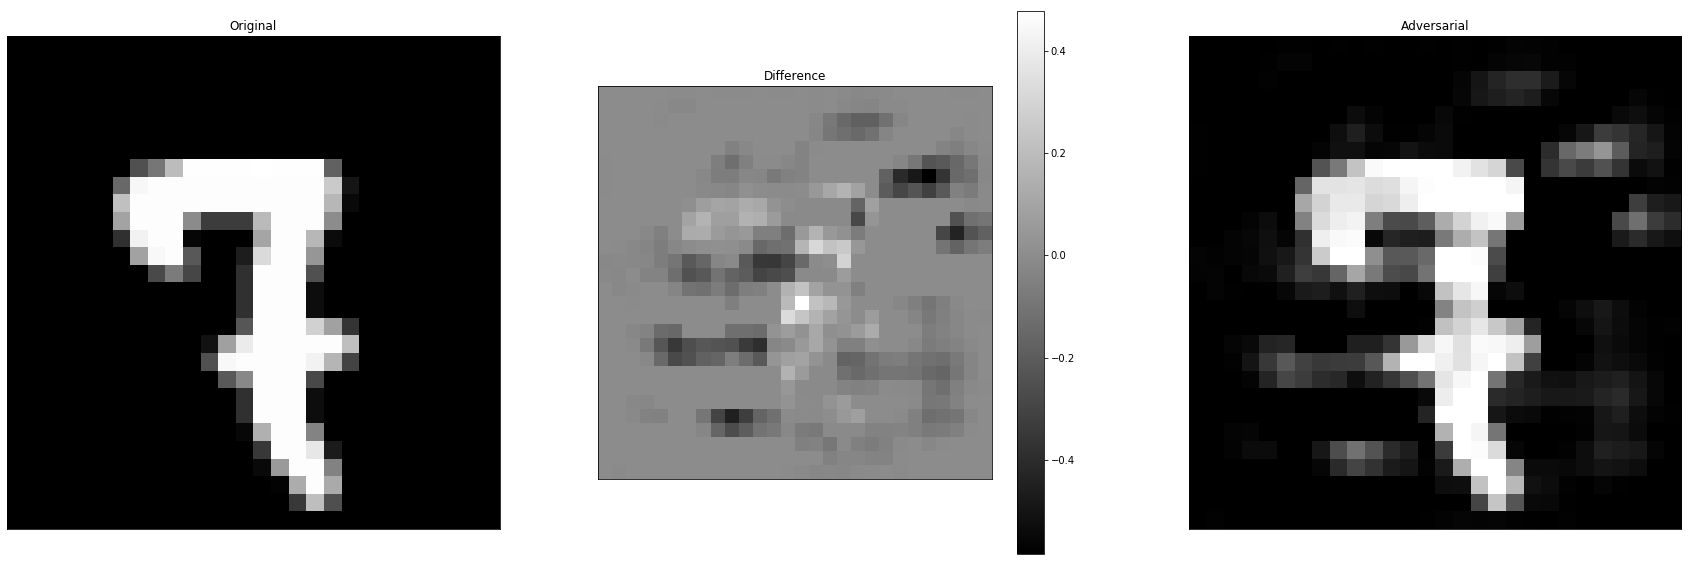

In [18]:
kmodel = keras.models.load_model('models/convolutional_dropout.h5')
adversarial = adversarial_lbfgs

[figure, axes] = plt.subplots(1, 3, figsize=(30,10))
images = (image[:, :, 0], (image[:, :, 0] - adversarial[:, :, 0]), adversarial[:, :, 0])
titles = ("Original", "Difference", "Adversarial")

for axis, imdata, title in zip(axes, images, titles):
    if title == "Difference":
        im = axis.imshow(imdata, cmap='gray')
        figure.colorbar(im, cmap='gray', ax=axis)
    else:
        axis.imshow(imdata, cmap='gray')
    axis.set_title(title)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
    
print("Label predicted: %d, true label: %d" %
      (np.argmax(fmodel.predictions(adversarial)),
       np.argmax(fmodel.predictions(image))))